In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance


# Check validity

In [2]:
def is_blurred(img_path, threshold = 50):
    # show img
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    # compute laplacian variance
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # TODO: valutare parametri
    laplacian_var = cv2.Laplacian(img_gray, cv2.CV_64F).var()
    print('Sharpeness:', round(laplacian_var, 5))
    return laplacian_var < threshold

In [3]:
def is_dark(img_path, threshold = 50):
    # show image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    # get brightness from HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    brightness = img_hsv[...,2].mean()
    print('Brightness:', round(brightness, 5))
    return brightness < threshold

In [7]:
def has_uniform_bg(img_path, threshold=20):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (250,250))
    img_resized = cv2.bilateralFilter(img_resized,45,200,40, cv2.BORDER_REFLECT)
    # extract stripes
    size = len(img_resized)
    margin = 3
    top_border = img_resized[0:margin,:]
    bottom_border = img_resized[size-margin:size,:]
    left_border = img_resized[:,0:margin]
    right_border = img_resized[:,size-margin:size]
    # concatenate stripes
    concatenated = np.concatenate([top_border, bottom_border, np.transpose(left_border), np.transpose(right_border)])
    # compute std
    std = concatenated.std()
    print('std', std)
    return std < threshold
    

In [148]:
def has_clear_margins(img_path, margin = 1):
    img = cv2.imread(img_path)
    # TODO: ragionare resize
    img_resized = cv2.resize(img, (250,250))
    img_resized = cv2.bilateralFilter(img_resized,45,200,40, cv2.BORDER_REFLECT)
    # extract stripes
    size = len(img_resized)
    top_border = img_resized[0:margin,:]
    bottom_border = img_resized[size-margin:size,:]
    left_border = img_resized[:,0:margin]
    right_border = img_resized[:,size-margin:size]
    # check edges presence in the borders
    top_canny = cv2.Canny(top_border, 100,  150) 
    bottom_canny = cv2.Canny(bottom_border, 100,  150) 
    left_canny = cv2.Canny(left_border, 100,  150) 
    right_canny = cv2.Canny(right_border, 100,  150)
    concatenated = np.concatenate([top_canny, bottom_canny, np.transpose(left_canny), np.transpose(right_canny)])
    # edges pixels are represented as 255 in canny, while the non-edges are 0
    return concatenated.max() == 0

In [155]:
img_path = '../test_imgs/not_blurred_2.jpg'
has_clear_margins(img_path, 1)


True

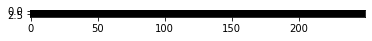

In [116]:
canny = canny = cv2.Canny(img, 100,  150) 
plt.imshow(canny, cmap='gray')

In [117]:
canny.max() == 0

True